In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = [12, 6]

print("Mumbai Vibe Map - Exploratory Data Analysis")
print("Multi-class vibe classification with 227 locations across 5 authentic Mumbai vibes")

Mumbai Vibe Map - Exploratory Data Analysis
Multi-class vibe classification with 227 locations across 5 authentic Mumbai vibes


In [6]:
df = pd.read_csv('eda.csv')

try:
    with open('eda_info.json', 'r') as f:
        ml_info = json.load(f)
    feature_cols = ml_info.get('feature_columns', [])
except:
    # Fallback
    print("Identifying features directly from dataset...")
    
    # Exclude metadata columns
    exclude_cols = [
        'location_id', 'name', 'lat', 'lng', 'vibe_category', 'vibe_source',
        'area', 'type', 'specialty', 'heritage_status', 'cuisine_type',
        'peak_dining_hours', 'peak_visiting_hours', 'peak_posting_hours',
        'data_collection_date'
    ]
    
    # Get feature columns (numerical and boolean only)
    feature_cols = [col for col in df.columns if col not in exclude_cols and 
                   df[col].dtype in ['int64', 'float64', 'bool']]
    
    print(f"Identified {len(feature_cols)} feature columns")

print(f"📊 Dataset Overview:")
print(f"   • Shape: {df.shape}")
print(f"   • Vibe Categories: {df['vibe_category'].nunique()}")
print(f"   • ML Features: {len(feature_cols)}")
print(f"   • Data Completeness: {(1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.1f}%")

📊 Dataset Overview:
   • Shape: (227, 247)
   • Vibe Categories: 5
   • ML Features: 0
   • Data Completeness: 100.0%


### Vibe Distribution and Geographic Patterns

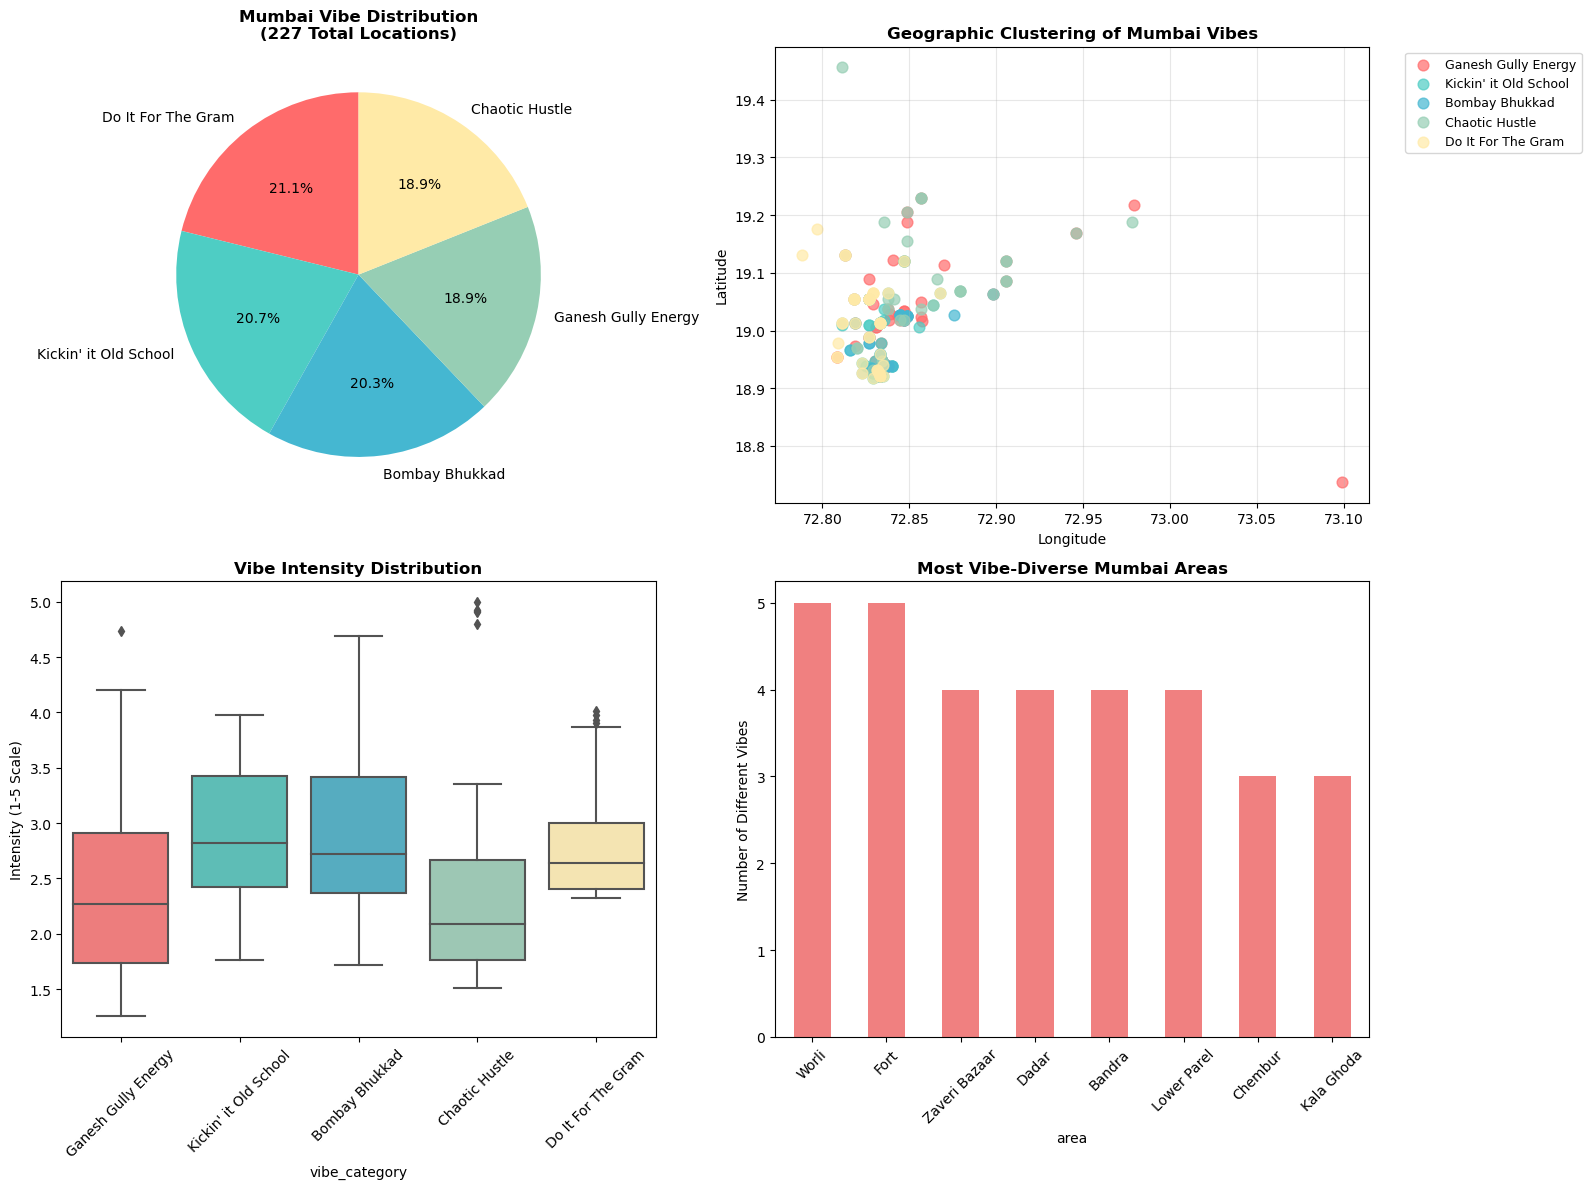

🔍 Key Geographic Insights:
   • Most diverse area: Worli (5 different vibes)
   • Average vibe intensity: 2.71/5.0
   • Geographic spread: 0.718° latitude


In [7]:
# Create comprehensive overview
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Vibe Distribution
vibe_counts = df['vibe_category'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

axes[0,0].pie(vibe_counts.values, labels=vibe_counts.index, autopct='%1.1f%%', 
              colors=colors, startangle=90)
axes[0,0].set_title('Mumbai Vibe Distribution\n(227 Total Locations)', fontweight='bold')

# 2. Geographic Distribution
for i, vibe in enumerate(df['vibe_category'].unique()):
    vibe_data = df[df['vibe_category'] == vibe]
    axes[0,1].scatter(vibe_data['lng'], vibe_data['lat'], 
                     alpha=0.7, s=60, label=vibe, color=colors[i])

axes[0,1].set_xlabel('Longitude')
axes[0,1].set_ylabel('Latitude') 
axes[0,1].set_title('Geographic Clustering of Mumbai Vibes', fontweight='bold')
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[0,1].grid(True, alpha=0.3)

# 3. Vibe Intensity Analysis
intensity_col = 'contextual_vibe_intensity' if 'contextual_vibe_intensity' in df.columns else 'vibe_intensity'
sns.boxplot(data=df, x='vibe_category', y=intensity_col, ax=axes[1,0], palette=colors)
axes[1,0].set_title('Vibe Intensity Distribution', fontweight='bold')
axes[1,0].set_ylabel('Intensity (1-5 Scale)')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Areas with Most Vibe Diversity
area_diversity = df.groupby('area')['vibe_category'].nunique().sort_values(ascending=False).head(8)
area_diversity.plot(kind='bar', ax=axes[1,1], color='lightcoral')
axes[1,1].set_title('Most Vibe-Diverse Mumbai Areas', fontweight='bold')
axes[1,1].set_ylabel('Number of Different Vibes')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Key insights
print("🔍 Key Geographic Insights:")
print(f"   • Most diverse area: {area_diversity.index[0]} ({area_diversity.iloc[0]} different vibes)")
print(f"   • Average vibe intensity: {df[intensity_col].mean():.2f}/5.0")
print(f"   • Geographic spread: {df['lat'].max() - df['lat'].min():.3f}° latitude")

### Interactive Mumbai Vibe Distribution Map

In [8]:
# Interactive map showing vibe distributions across Mumbai
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("Creating Interactive Mumbai Vibe Distribution Map")
vibe_colors = {
    'Ganesh Energy': '#FF6B00',
    "Kickin' it Old School": '#4682B4', 
    'Bombay Bhukkad': '#000000',
    'Chaotic Hustle': '#8A2BE2',
    'Do It For The Gram': '#FF1493'
}
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lng", 
    color="vibe_category",
    hover_name="name",
    hover_data={
        "area": True,
        "vibe_intensity": ":.2f" if "vibe_intensity" in df.columns else False,
        "contextual_vibe_intensity": ":.2f" if "contextual_vibe_intensity" in df.columns else False,
        "lat": False,
        "lng": False
    },
    color_discrete_map=vibe_colors,
    size_max=15,
    zoom=10,
    height=700,
    title="Mumbai Vibe Map - Interactive Distribution of 227 Locations",
    mapbox_style="open-street-map"
)
fig.update_layout(
    title_font_size=16,
    title_x=0.5,
    font=dict(size=12),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left", 
        x=1.01,
        bgcolor="rgba(255,255,255,0.8)"
    ),
    margin=dict(l=0, r=150, t=50, b=0)
)
fig.show()

# Print summary statistics
print(f"\n📊 Geographic Distribution Summary:")
print(f"   • Total Locations Mapped: {len(df)}")
print(f"   • Latitude Range: {df['lat'].min():.4f} to {df['lat'].max():.4f}")
print(f"   • Longitude Range: {df['lng'].min():.4f} to {df['lng'].max():.4f}")
print(f"   • Geographic Span: ~{(df['lat'].max() - df['lat'].min()) * 111:.1f}km N-S")

# Show vibe clustering by area
print(f"Top Areas by Vibe Diversity:")
area_vibe_counts = df.groupby('area')['vibe_category'].nunique().sort_values(ascending=False)
for area, vibe_count in area_vibe_counts.head(5).items():
    locations_in_area = len(df[df['area'] == area])
    print(f"   • {area}: {vibe_count} different vibes ({locations_in_area} locations)")

Creating Interactive Mumbai Vibe Distribution Map



📊 Geographic Distribution Summary:
   • Total Locations Mapped: 227
   • Latitude Range: 18.7378 to 19.4559
   • Longitude Range: 72.7883 to 73.0989
   • Geographic Span: ~79.7km N-S
Top Areas by Vibe Diversity:
   • Worli: 5 different vibes (9 locations)
   • Fort: 5 different vibes (31 locations)
   • Zaveri Bazaar: 4 different vibes (4 locations)
   • Dadar: 4 different vibes (11 locations)
   • Bandra: 4 different vibes (24 locations)
